<a href="https://colab.research.google.com/github/Haebuk/Python_Machine_Learning/blob/master/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyOD -q
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.auto_encoder import AutoEncoder
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data, evaluate_print
from pyod.utils.example import visualize

In [ ]:
X_train, y_train, X_test, y_test = generate_data(
    n_train=10000, n_test=500, n_features=2
)

/usr/local/lib/python3.7/dist-packages/pyod/utils/data.py:189: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [ ]:
# detector 초기화
IF = IForest()
abod = ABOD()
ae = AutoEncoder(hidden_neurons=[2,1,1,2], epochs=40)
knn = KNN()
IF.fit(X_train)
abod.fit(X_train)
ae.fit(X_train)
knn.fit(X_train)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_7 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout_8 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

score ROC:1.0, precision @ rank n:1.0


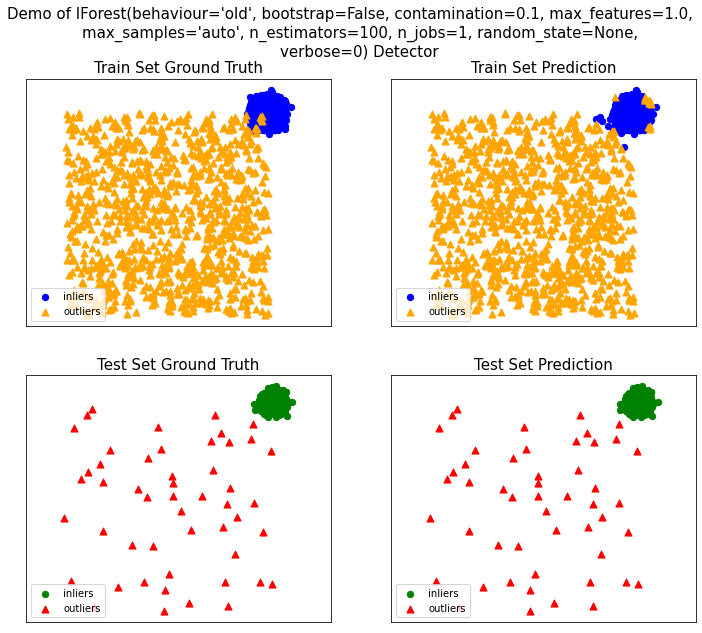

score ROC:0.999, precision @ rank n:0.96


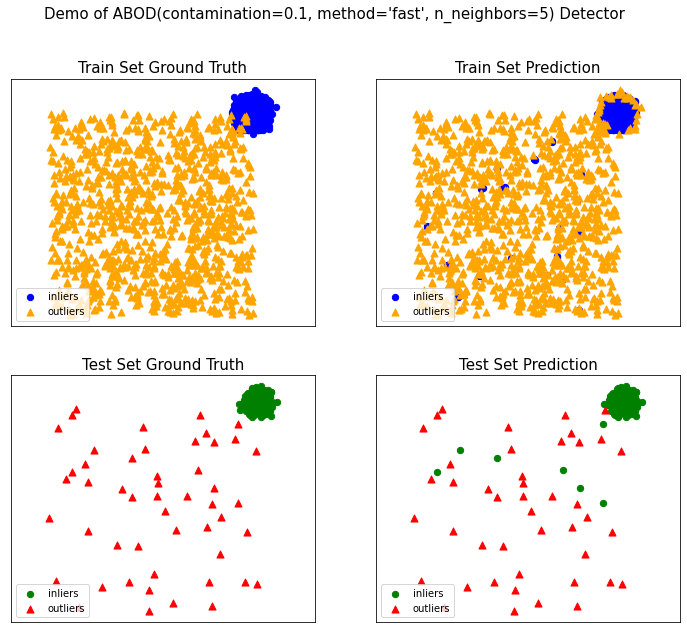

score ROC:1.0, precision @ rank n:0.98


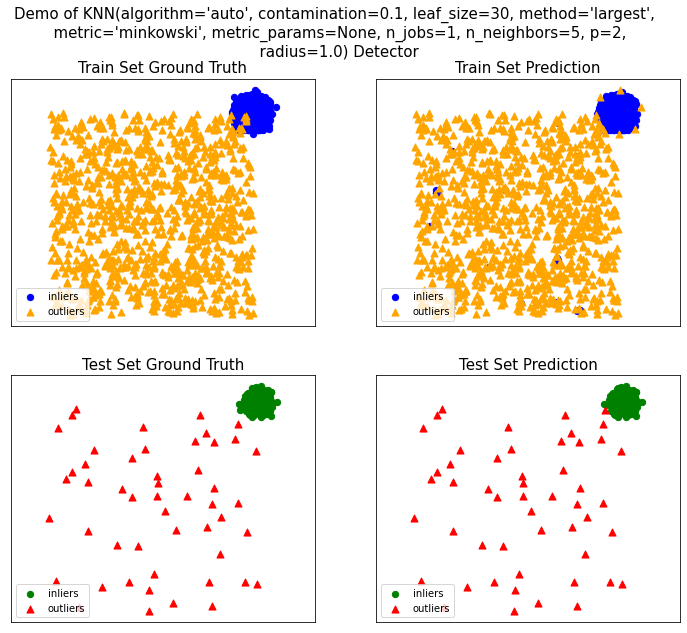

score ROC:0.992, precision @ rank n:0.96


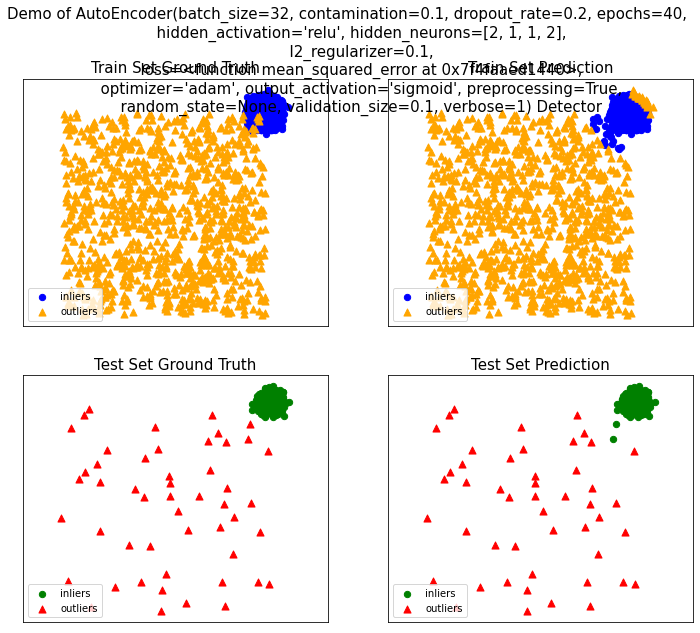

In [ ]:
detectors = [IF, abod, knn, ae]
for d in detectors:
    # binary labels
    y_train_pred = d.predict(X_train)
    y_test_pred = d.predict(X_test)

    # raw outlier scores
    y_test_scores = d.decision_function(X_test)

    # outlier probability
    #y_test_proba = display.predict_proba(X_test)

    # performance evaluation
    evaluate_print('score', y_test, y_test_scores)

    # prediction visualization
    visualize(d, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred)